# Risk Comparsion

1. Get rankings of risk prediction scores from PCE and DDH
2. Look at their relative positions 
3. See how many of them are reclassified. 

## Project PCE thresholds DDH Risks

In [34]:
import pandas as pd

In [35]:
ddh_risk_df = pd.read_csv('/Users/excenity/Dropbox/HSIP/Research/MESA/Output/DDH_pred_df.csv')

In [36]:
ddh_risk_df['risk_category'] = 'low'
ddh_risk_df.loc[(ddh_risk_df['value'] >= 0.05) & (ddh_risk_df['value'] < 0.075), 'risk_category'] = 'borderline'
ddh_risk_df.loc[(ddh_risk_df['value'] >= 0.075) & (ddh_risk_df['value'] < 0.2), 'risk_category'] = 'intermediate'
ddh_risk_df.loc[(ddh_risk_df['value'] >= 0.20), 'risk_category'] = 'high'

In [37]:
ddh_risk_df.risk_category.value_counts()/len(ddh_risk_df)

intermediate    0.443096
low             0.405918
borderline      0.150986
Name: risk_category, dtype: float64

<AxesSubplot:>

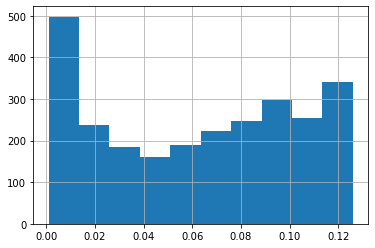

In [38]:
ddh_risk_df.value.hist()

## Ranking Comparison

In [39]:
pce_pred_df = pd.read_csv('/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/GitHub/Dynamic-DeepHit LRPP/pce_pred_df.csv')

In [40]:
pce_pred_df_order = pce_pred_df.loc[:,['risk', 'risk_cat', 'true_label']].sort_values('risk').reset_index().rename(columns = {'index': 'id'}).reset_index().rename(columns = {'index': 'risk_order_pce'})

In [41]:
pce_pred_df_order

,risk_order_pce,id,risk,risk_cat,true_label
0,0,2010,0.001,Low Risk,0
1,1,1519,0.001,Low Risk,0
2,2,1635,0.001,Low Risk,0
3,3,1642,0.001,Low Risk,0
4,4,1576,0.001,Low Risk,0
...,...,...,...,...,...
2627,2627,821,0.667,High Risk,0
2628,2628,69,0.669,High Risk,1
2629,2629,1281,0.695,High Risk,0
2630,2630,886,0.826,High Risk,0


In [42]:
ddh_risk_df = ddh_risk_df.loc[ddh_risk_df_order.id.isin(pce_pred_df_order['id']),]
ddh_risk_df_order = ddh_risk_df.loc[:,['value', 'risk_category']].sort_values('value').reset_index().rename(columns = {'index': 'id'}).reset_index().rename(columns = {'index': 'risk_order_ddh'})

In [43]:
ddh_risk_df_order

,risk_order_ddh,id,value,risk_category
0,0,1576,0.000965,low
1,1,2608,0.001262,low
2,2,2091,0.001322,low
3,3,1894,0.001367,low
4,4,1590,0.001427,low
...,...,...,...,...
2627,2627,2487,0.126013,intermediate
2628,2628,724,0.126013,intermediate
2629,2629,1144,0.126013,intermediate
2630,2630,354,0.126013,intermediate


In [44]:
pce_pred_df_order = pce_pred_df_order.rename(columns = {'risk_cat' : 'risk_cat_pce'})
ddh_risk_df_order = ddh_risk_df_order.rename(columns = {'risk_category' : 'risk_cat_ddh'})

In [45]:
risk_df_order = pd.merge(pce_pred_df_order, ddh_risk_df_order)

In [46]:
risk_df_order.to_csv('risk_df_order.csv', index = False)

## Risk Comparison
1. Scale risk scores to mean 

In [ ]:
len(pce_pred_df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

risk_df = pd.concat([ddh_risk_df['value'], pce_pred_df['risk']], axis = 1)
risk_df.columns = ['ddh_risk', 'pce_risk']

scaler = MinMaxScaler()
risk_df_scale = scaler.fit_transform(risk_df.to_numpy())
risk_df_scale = pd.DataFrame(risk_df_scale)

risk_df_scale = risk_df_scale.reset_index().rename(columns = {'index':'id'})
risk_df_scale.columns = ['index','ddh_risk_scaled', 'pce_risk_scaled']

In [ ]:
risk_df_scale.mean()

In [ ]:
# calculate distance
risk_df_scale['ddh_risk_scaled_dist'] = (risk_df_scale['ddh_risk_scaled'] - risk_df_scale['ddh_risk_scaled'].mean())
risk_df_scale['pce_risk_scaled_dist'] = (risk_df_scale['pce_risk_scaled'] - risk_df_scale['pce_risk_scaled'].mean()) 

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(5, 5)})

In [ ]:
sns.scatterplot(data=risk_df_scale, x="pce_risk_scaled_dist", y="ddh_risk_scaled_dist")

In [ ]:
risk_df_scale.pce_risk_scaled. hist()

In [ ]:
risk_df_scale.ddh_risk_scaled.hist()